Descriptive Statistics and Python Implementation:

In [2]:
# importing important modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
import seaborn as sns
import warnings
import statsmodels.api as sm
import pylab as py
warnings.filterwarnings('ignore')

In [3]:
# reading data
data = pd.read_csv('data.csv')

In [4]:
# first 5 lines of data
data.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


# 1) Mean:
Often called as Average.
Mean = Σ(x)/n  , where Σ(x) is the sum of quantities, while n is the number of quantities.

Example without library function: Mean of "Annual_HH_Income".

In [5]:
sum(data['Annual_HH_Income'])/len(data['Annual_HH_Income'])

490019.04

Example with library function: Mean of "Annual_HH_Income".



In [6]:
np.mean(data['Annual_HH_Income'])


490019.04

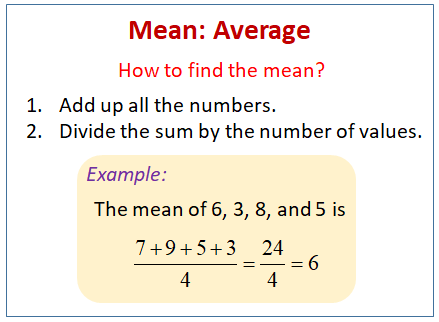

# 2) Median:
Median is nothing but the absolute central value of the data set.

Example without library function: Mean of "Annual_HH_Income".

In [7]:
income = data['Annual_HH_Income'].sort_values().reset_index(drop = True)
length = len(income)
if length % 2 == 0:
    median1 = income[length//2]
    median2 = income[length//2 - 1]
    median = (median1 + median2)/2
else:
    median = income[length//2]
print("The median of the given numbers Annual_HH_Income is", median)

The median of the given numbers Annual_HH_Income is 447420.0


 Example with library function: Mean of "Annual_HH_Income".



In [8]:
np.median(data['Annual_HH_Income'])

447420.0

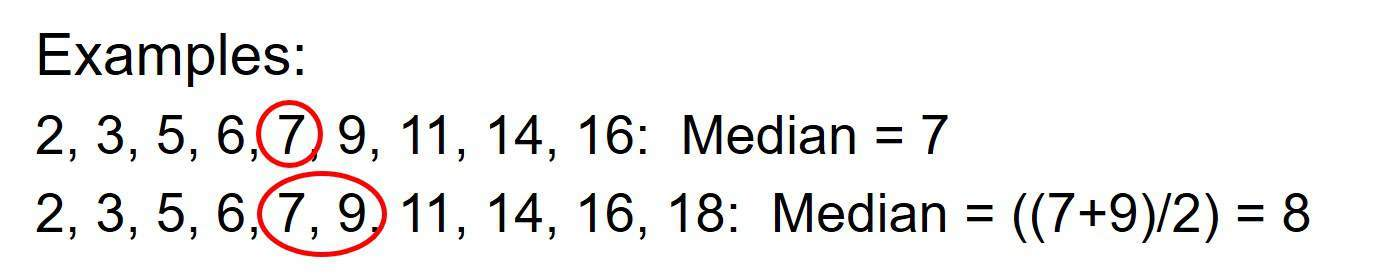

# 3) Mode:
It is the number which occurs most frequently in the data series.              
It is robust and is not generally affected much by addition of a couple of new values.

Example without library function: Mode of "Highest_Qualified_Member".

In [9]:
num_list = data['Highest_Qualified_Member']

dic = dict(data['Highest_Qualified_Member'].value_counts())

max_value = max(list(dic.values()))
mode_val = [num for num, freq in dic.items() if freq == max_value]
if len(mode_val) == len(num_list):
    print("No mode in the list")
else:
    print(''.join(map(str, mode_val)))

Graduate


Example with library function: Mode of "Highest_Qualified_Member".



In [10]:
data['Highest_Qualified_Member'].mode()

0    Graduate
dtype: object

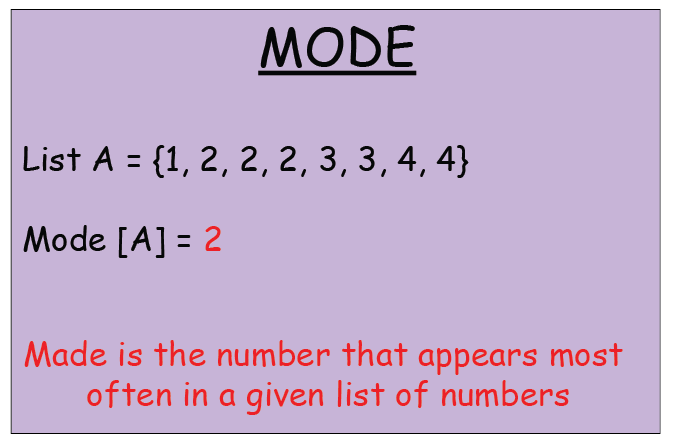

# 4) Variance:
Variance is the average squared deviations from the mean.

<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>&#x3C3;</mi>
  <mn>2</mn>
  <mo>=</mo>
  <mo>&#x2211;</mo>
  <mo stretchy="false">(</mo>
  <mi>x</mi>
  <mo>&#x2212;</mo>
  <mrow data-mjx-texclass="ORD">
    <mover>
      <mi>x</mi>
      <mo stretchy="false">&#xAF;</mo>
    </mover>
  </mrow>
  <msup>
    <mo stretchy="false">)</mo>
    <mn>2</mn>
  </msup>
  <mrow data-mjx-texclass="ORD">
    <mo>/</mo>
  </mrow>
  <mn>2</mn>
</math>

Example without library function: Variance of "Annual_HH_Income".

In [12]:
mean = data['Annual_HH_Income'].mean()
difference = data['Annual_HH_Income'] - mean
squared_difference = difference ** 2
variance = squared_difference.mean()
print(variance)

100437186889.95831


Example with library function: Variance of "Annual_HH_Income".



In [13]:
data['Annual_HH_Income'].var(ddof = 0)

100437186889.95831

# 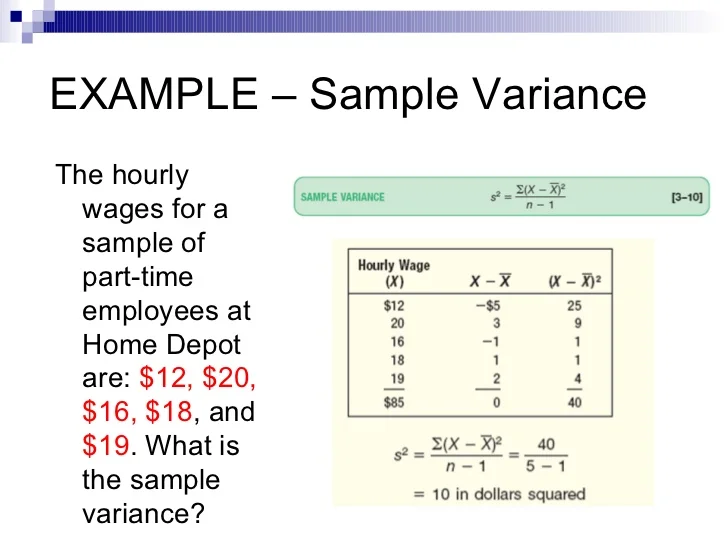

# 5) Standard Deviation:
The standard deviation (SD), also represented by the Greek letter sigma σ or the Latin letter (s) is a measure that is used to quantify the amount of variation or dispersion of a set of data values.

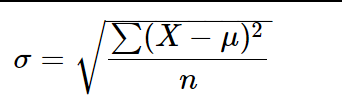

Example without library function: Standard Deviation of "Annual_HH_Income".

In [14]:
mean = data['Annual_HH_Income'].mean()
difference = data['Annual_HH_Income'] - mean
squared_difference = difference ** 2
variance = squared_difference.mean()
standard_deviation = variance ** (1/2)
print(standard_deviation)

316918.26531451027


Example with library function: Standard Deviation of "Annual_HH_Income".




In [18]:
data['Annual_HH_Income'].std(ddof = 0)

316918.26531451027

# 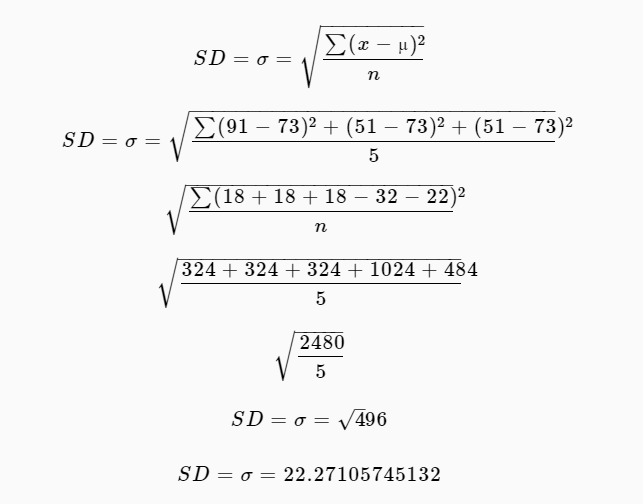

# 6) Correlation:
It is used to determine the relationships between two variables.      
Correlation Coefficient is denoted by r.                        
The value ranges from -1 to 1. Here, 0 means no Correlation Coefficient.          
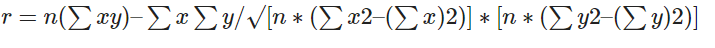

In [17]:
data.corr()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
Mthly_HH_Income,1.000000,0.649215,0.448317,0.036976,0.970315,0.347883
Mthly_HH_Expense,0.649215,1.000000,0.639702,0.405280,0.591222,0.311915
No_of_Fly_Members,0.448317,0.639702,1.000000,0.085808,0.430868,0.597482
Emi_or_Rent_Amt,0.036976,0.405280,0.085808,1.000000,0.002716,-0.097431
Annual_HH_Income,0.970315,0.591222,0.430868,0.002716,1.000000,0.296679
No_of_Earning_Members,0.347883,0.311915,0.597482,-0.097431,0.296679,1.000000


<AxesSubplot:>

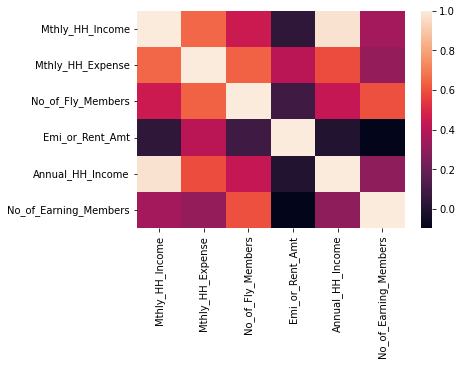

In [19]:
sns.heatmap(data.corr())

In [21]:
data[['Mthly_HH_Income', 'Annual_HH_Income']].corr()

,Mthly_HH_Income,Annual_HH_Income
Mthly_HH_Income,1.000000,0.970315
Annual_HH_Income,0.970315,1.000000


<AxesSubplot:>

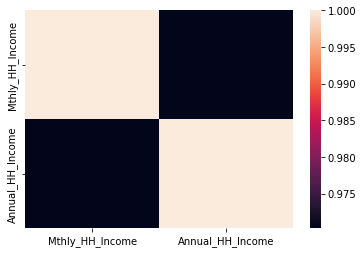

In [23]:
sns.heatmap(data[['Mthly_HH_Income', 'Annual_HH_Income']].corr())

# 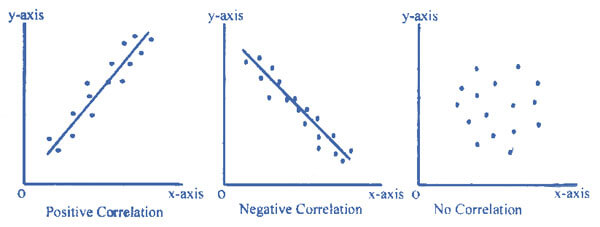

# 7) Normal Distribution:
The normal distribution, also known as the Gaussian distribution, is the most important probability   distribution in statistics for independent, random variables. Most people recognize its familiar     bell-shaped curve in statistical reports.
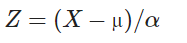

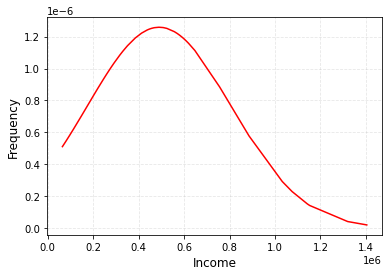

In [25]:
mean = np.mean(data['Annual_HH_Income'])
std = np.std(data['Annual_HH_Income'])

pdf = stats.norm.pdf(data['Annual_HH_Income'].sort_values(), mean, std)

plt.plot(data["Annual_HH_Income"].sort_values(), pdf, color = 'r')
plt.xlabel("Income", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()

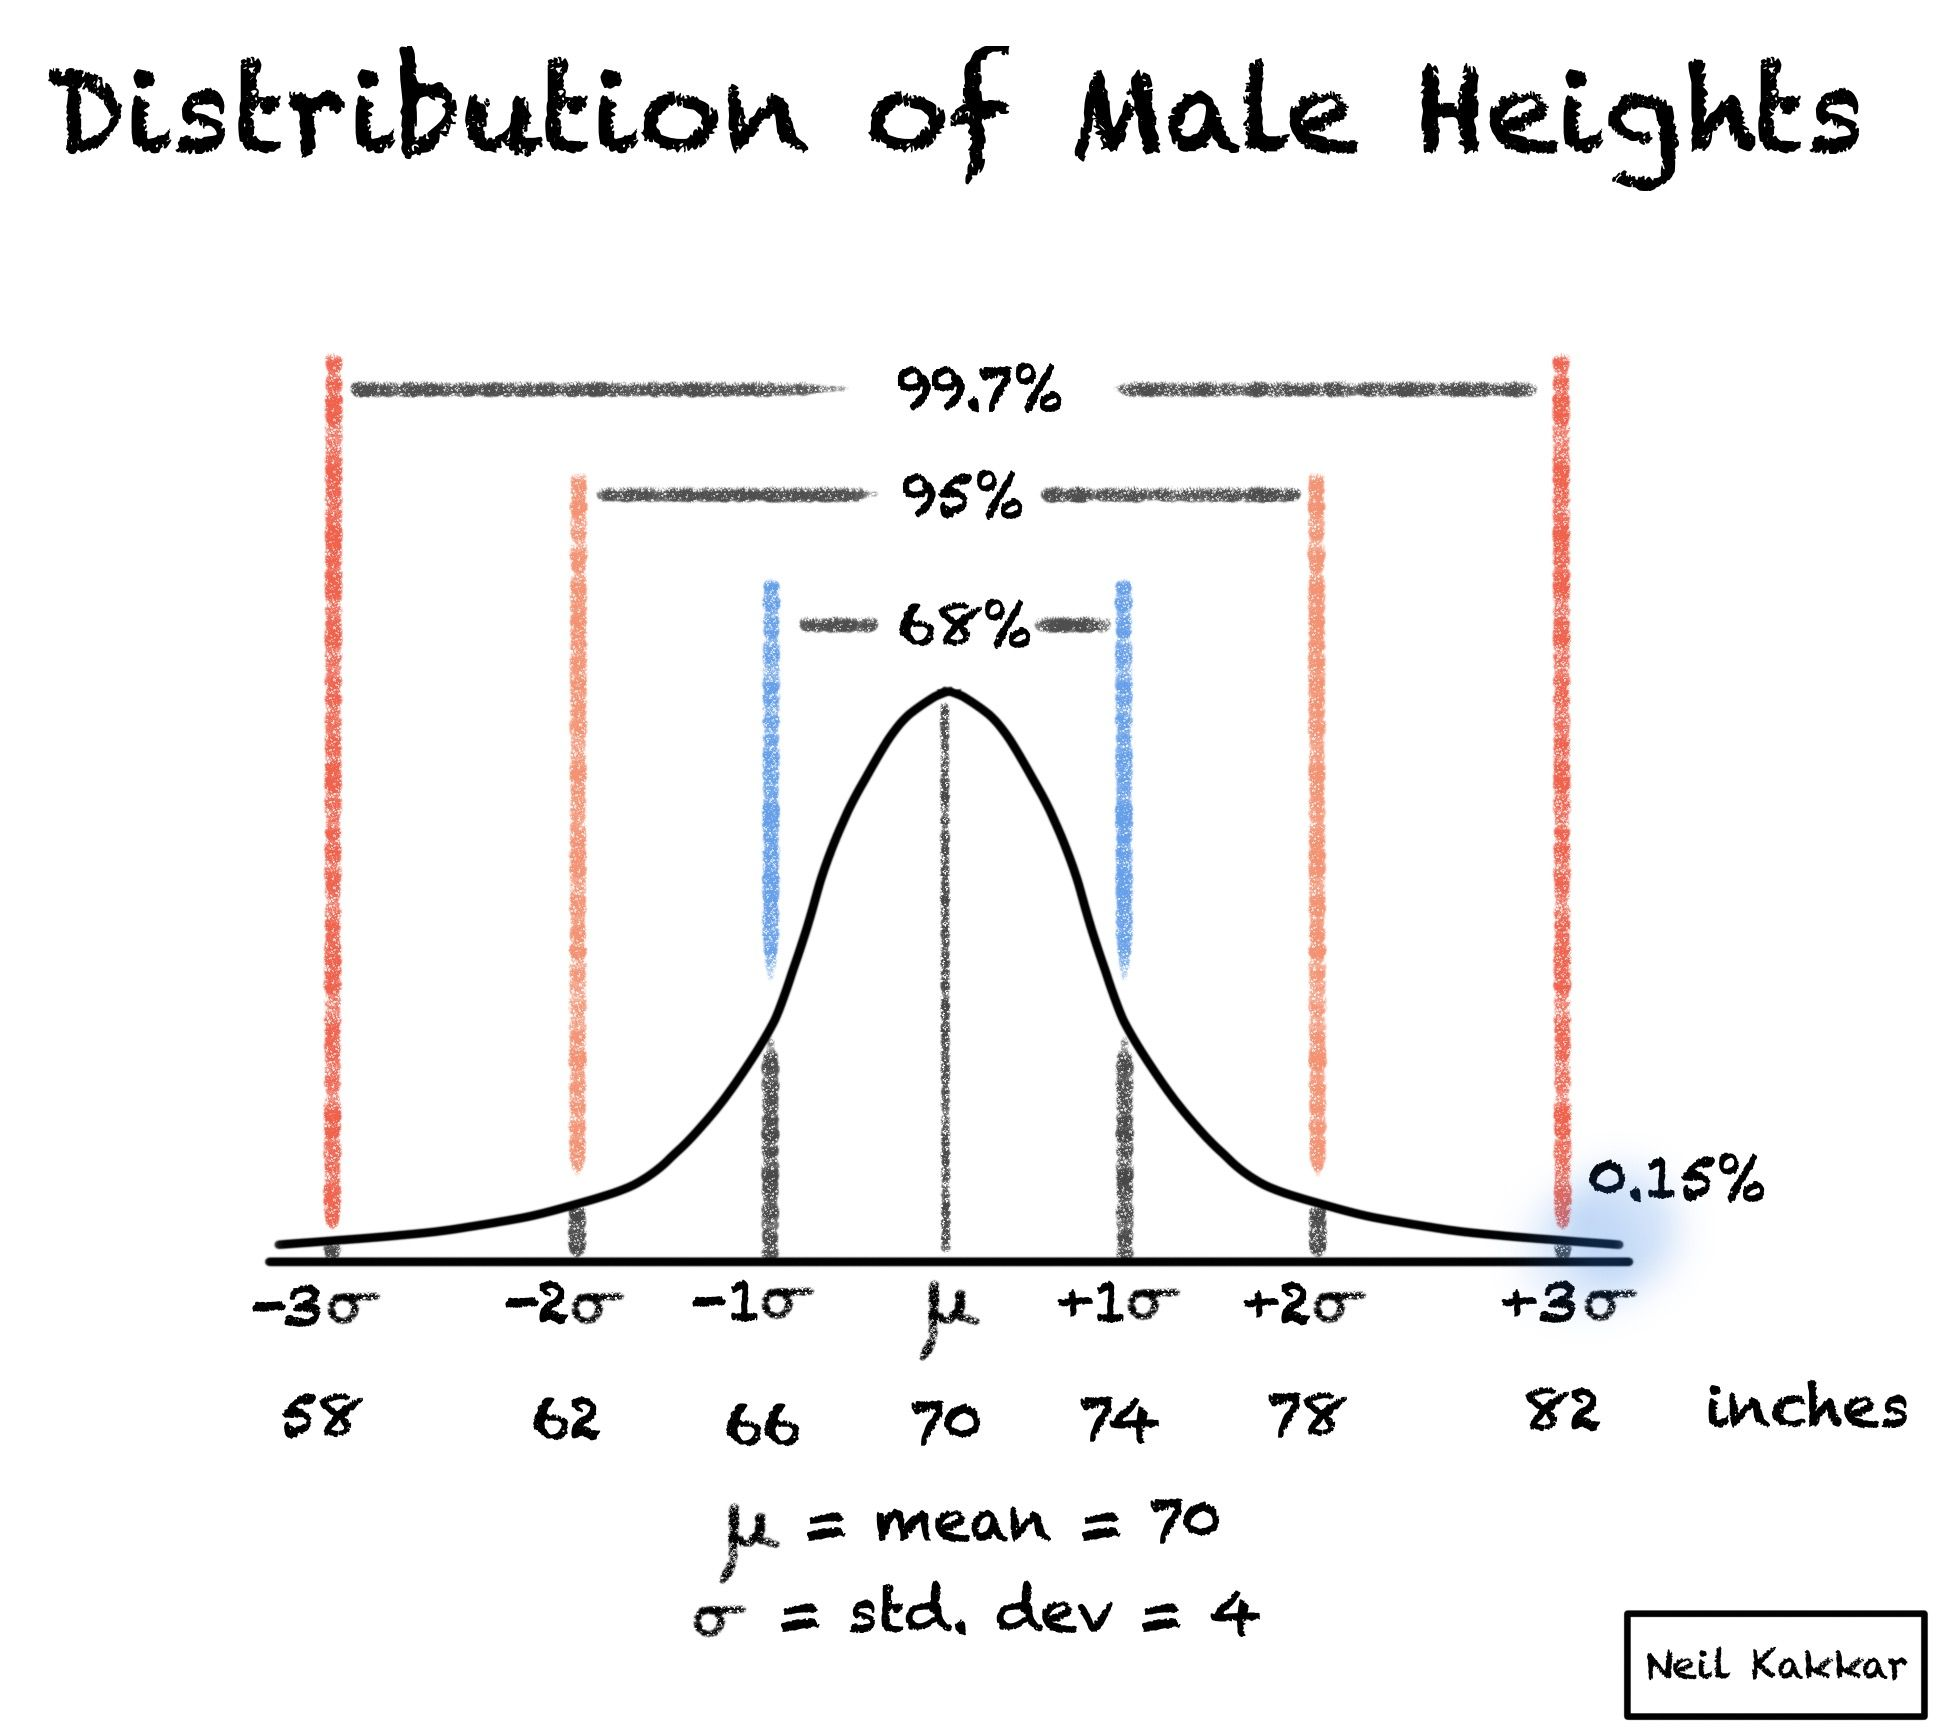

# 8) Feature of Normal Distribution:
Normal Distribution has the following characteristics that distinguish it from the other forms of probability representations:

Empirical Rule: In a normal distribution, 68% of the observations are confined within -/+ one standard deviation, 95% of the values fall within -/+ two standard deviations, and almost 99.7% of values are confined to -/+ three standard deviations.

Bell-shaped Curve: Most of the values lie at the center, and fewer values lie at the tail extremities. This results in a bell-shaped curve.

Mean and Standard Deviation: This data representation is shaped by mean and standard deviation.
Equal Central Tendencies: The mean, median, and mode of this data are equal.

Symmetric: The normal distribution curve is centrally symmetric. Therefore, half of the values are to the left of the center, and the remaining values appear on the right.

Skewness and Kurtosis: Skewness is the the symmetry. The skewness for a normal distribution is zero. Kurtosis studies the tail of the represented data. For a normal distribution, the kurtosis is 3.

Total Area = 1: The total value of the standard deviation, i.e., the complete area of the curve under this probability function, is one. Also, the entire mean is zero.

# 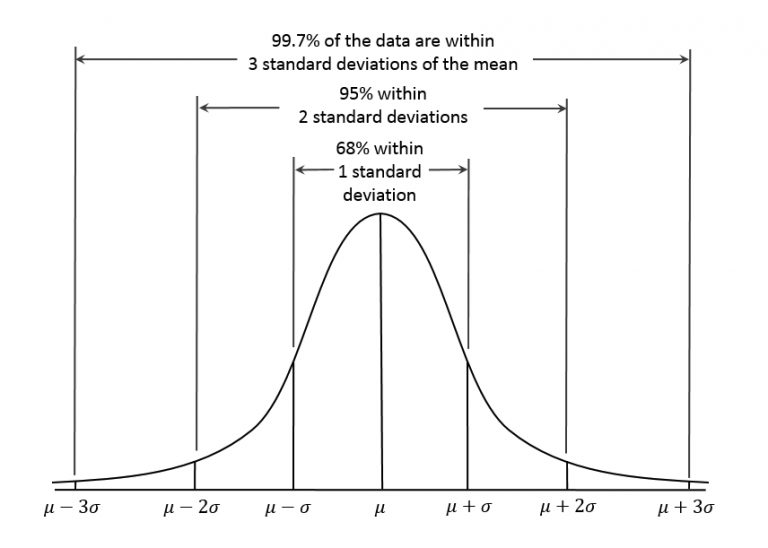

# 9) Posetively Skewed Normal Distribution:
In statistics, a positively skewed (or right-skewed) distribution is a type of distribution in which most values are clustered around the left tail of the distribution while the right tail of the distribution is longer. The positively skewed distribution is the direct opposite of the negatively skewed distribution.

# Negatively Skewed Normal Distribution:
In statistics, a negatively skewed (also known as left-skewed) distribution is a type of distribution in which more values are concentrated on the right side (tail) of the distribution graph while the left tail of the distribution graph is longer.

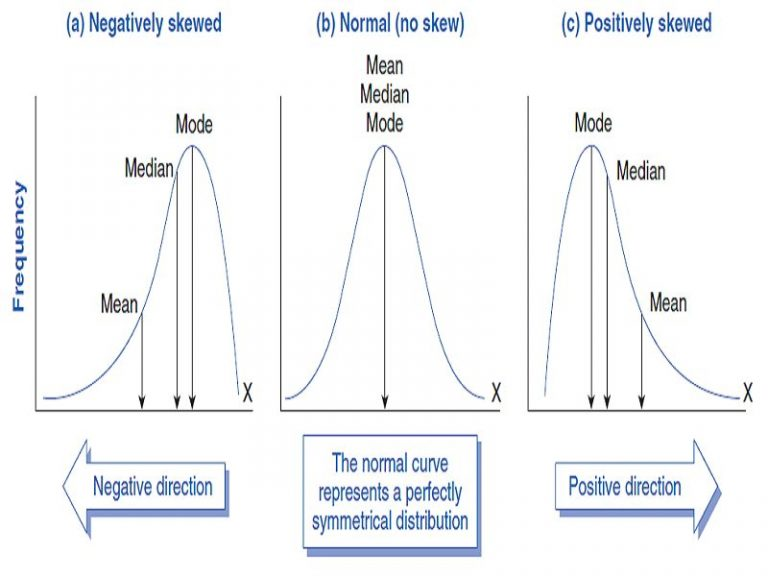

# 10) Effect on Mean, Median and Mode due to Skewness:
Consider the following data set.
4; 5; 6; 6; 6; 7; 7; 7; 7; 7; 7; 8; 8; 8; 9; 10

This data set can be represented by following histogram. Each interval has width one, and each value is located in the middle of an interval.

# Figure 1
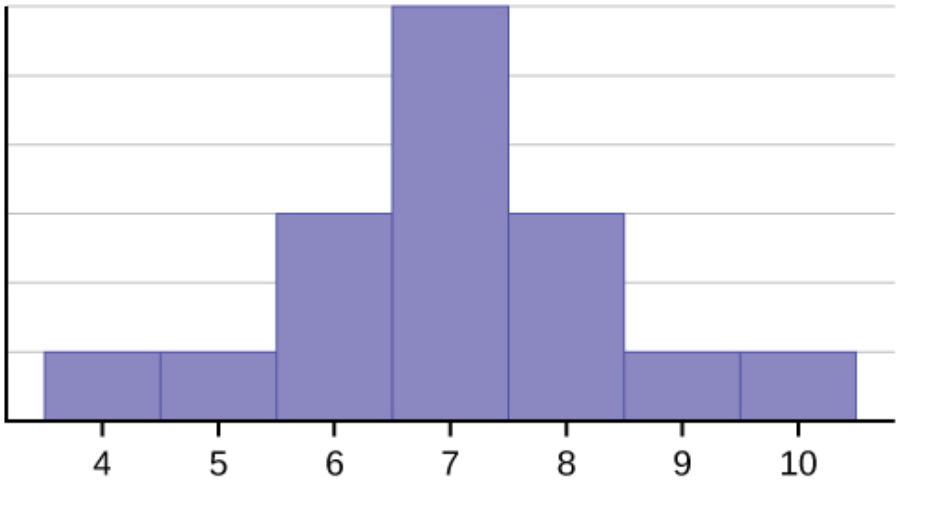


# Figure 2
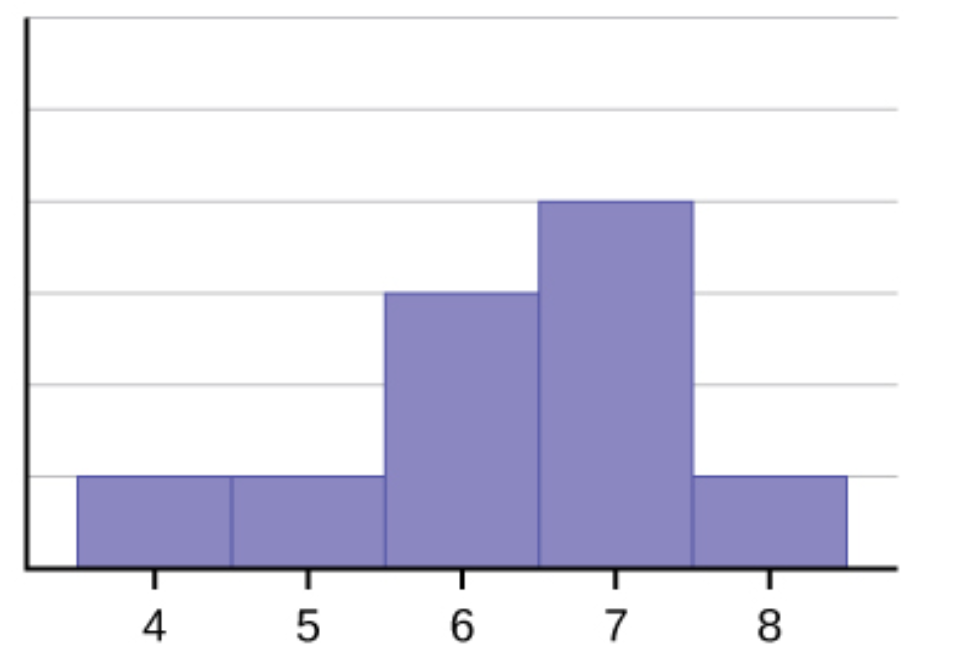

The mean is 6.3, the median is 6.5, and the mode is seven. Notice that the mean is less than the median, and they are both less than the mode. The mean and the median both reflect the skewing, but the mean reflects it more so.

The histogram for the data: 67777888910, is also not symmetrical. It is skewed to the right.

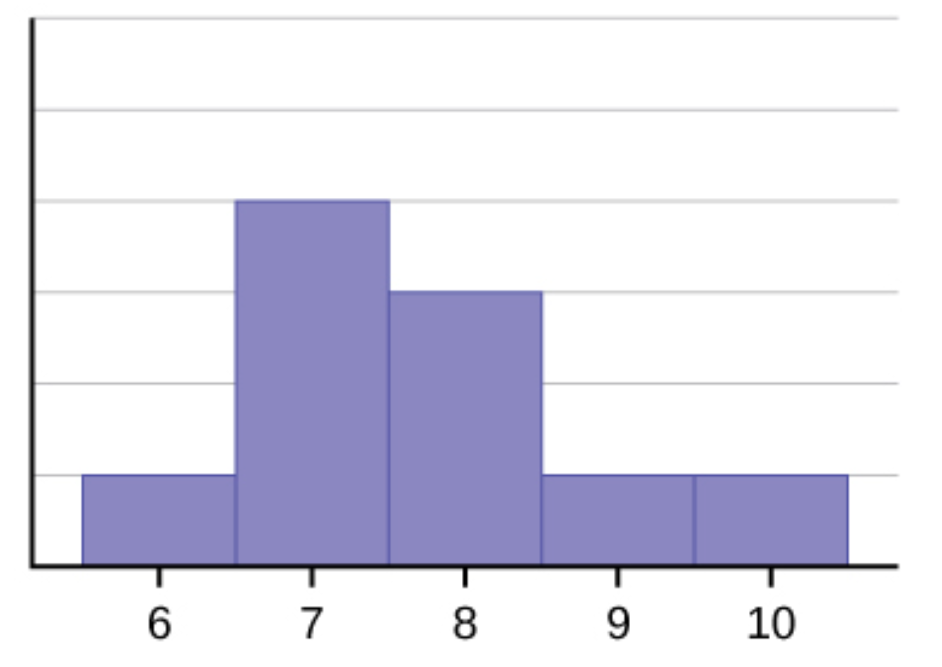

The mean is 7.7, the median is 7.5, and the mode is seven. Of the three statistics, the mean is the largest, while the mode is the smallest. Again, the mean reflects the skewing the most.

To summarize, generally if the distribution of data is skewed to the left, the mean is less than the median, which is often less than the mode. If the distribution of data is skewed to the right, the mode is often less than the median, which is less than the mean.

# 11) Explain QQ Plot and show the implementation of the same:
The quantile-quantile plot is a graphical method for determining whether two samples of data came from the same population or not. A q-q plot is a plot of the quantiles of the first data set against the quantiles of the second data set. By a quantile, we mean the fraction (or percent) of points below the given value.

For the reference purpose, a 45% line is also plotted, if the samples are from the same population then the points are along this line.

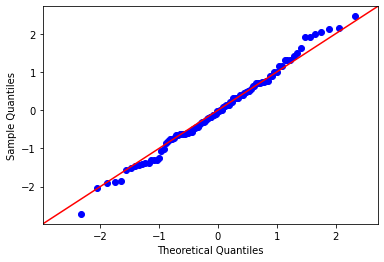

In [26]:
# Random data points generated
data_points = np.random.normal(0, 1, 100) 
sm.qqplot(data_points, line ='45')
py.show()

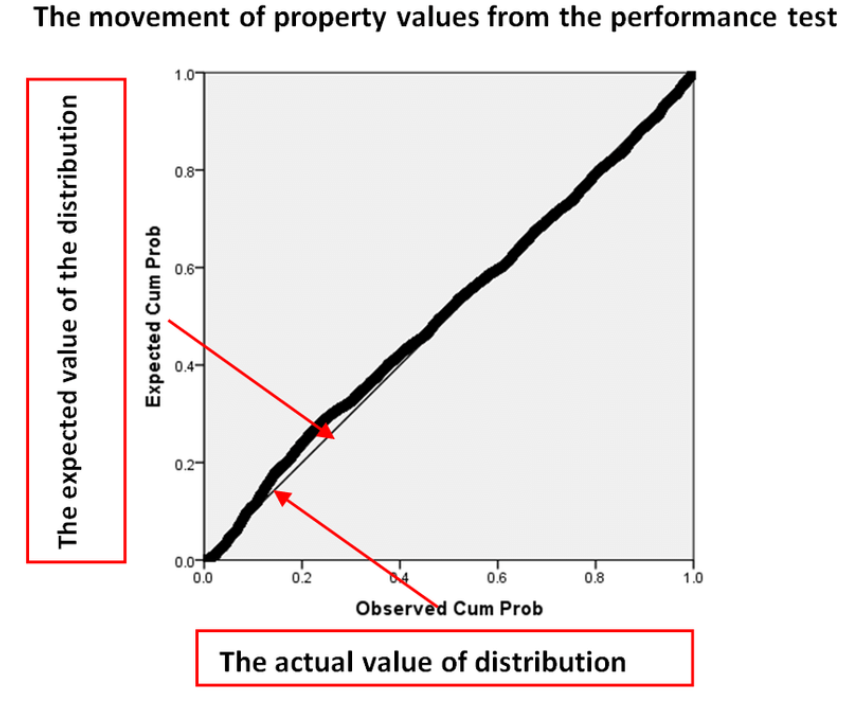

# 12) Explain Box Cox and show the implementation of the same:
The Box-Cox transformation is to transform the data so that its distribution is as close to a normal distribution as possible, that is, the histogram looks like a bell.

This technique has its place in feature engineering because not all species of predictive models are robust to skewed data, so it is worth using when experimenting. It probably won’t provide a spectacular improvement, although at the fine-tuning stage it can serve its purpose by improving our evaluation metric.

Distribution before Box Cox Transformation:

<AxesSubplot:xlabel='Annual_HH_Income', ylabel='Density'>

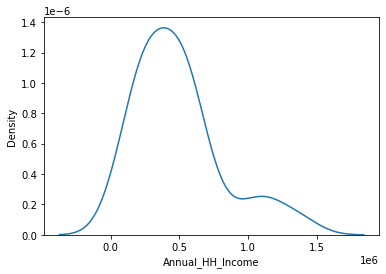

In [27]:
#plot the distribution of data values
sns.distplot(data['Annual_HH_Income'], hist=False, kde=True)

Distribution after Box Cox Transformation:

<AxesSubplot:ylabel='Density'>

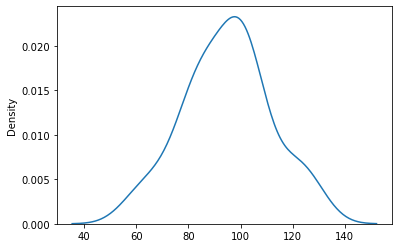

In [28]:
#perform Box-Cox transformation on original data
transformed_data, best_lambda = stats.boxcox(data['Annual_HH_Income']) 

#plot the distribution of the transformed data values
sns.distplot(transformed_data, hist=False, kde=True)

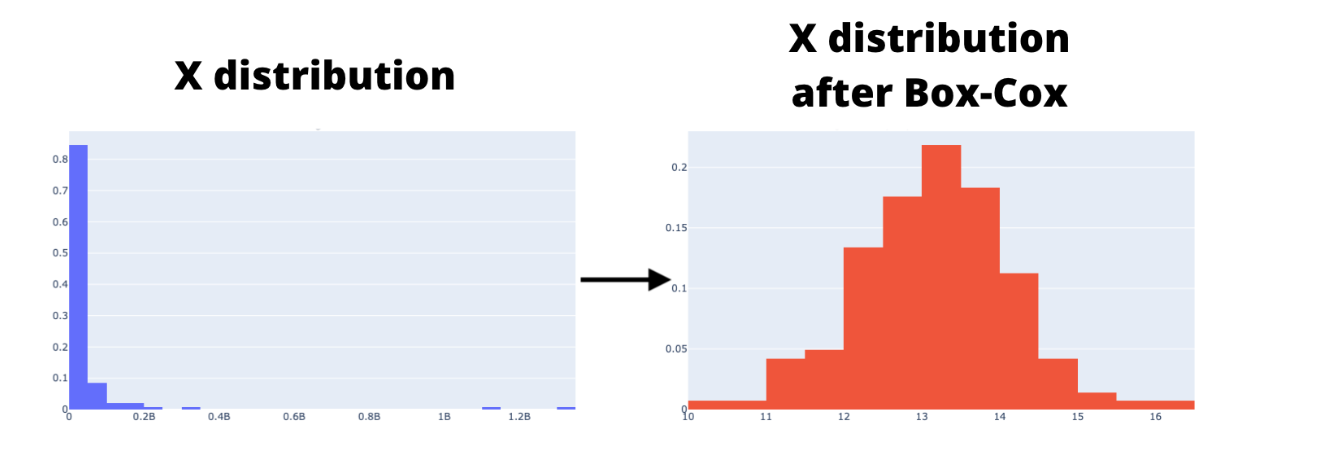

# FINISH